## Hodgkin-Huxley simulation
Some code to simulate an axon's response to an applied stimulus current 
based on the Hodgkin-Huxley equations as described in the 1952 paper 
(cited below). Allows for visualization of how the gating variables `m`, `h`, 
and `n` influence ionic currents and membrane voltage, how the gating 
variables change based on their respective rate constants `a` and `B`, and 
how those rate constants are dependent on the membrane voltage.

Provides code to simulate an action potential using the moden convention 
(resting potential at -60mV and positive ions into the cell = voltage gets 
more positive) instead of the original Hodgkin-Huxley convention (resting 
potential at 0mV and sign of voltage is flipped) because that's what we're used to. Also replicates the graphs from the Hodgkin-Huxley paper using the 
modern convention. 

- The matlab code also replicates the graphs using the original Hodgkin-Huxley convention - I might add that here too if I have time

In "The Annotated Hodgkin and Huxley" (linked below), the modern versions 
of the graphs should match what is simulated here using the modern convention.

HODGKIN AL, HUXLEY AF. A quantitative description of membrane current and 
its application to conduction and excitation in nerve. 
J Physiol. 1952 Aug;117(4):500-44. doi: 10.1113/jphysiol.1952.sp004764. 
PMID: 12991237; PMCID: PMC1392413.

The Annotated Hodgkin and Huxley: A Reader's Guide 
https://press.princeton.edu/books/paperback/9780691220635/the-annotated-hodgkin-and-huxley

In [34]:
import numpy as np
import matplotlib.pyplot as plt

'''
Equilibrium potentials and equations as written in the original 
Hodgkin-Huxley paper. The constants come from Table 3. In 
"The Annotated Hodgkin and Huxley", equations for the rate constants are 
on page 222 and Table 3 is on page 224. 

Note that the modern convention functions and equilibrium potentials differ 
from the ones in the original paper: The sign of the voltage has been 
flipped and the voltage is shifted down by 60mV so the resting potential of 
the axon is at -60mV instead of 0mV. I would cite my source for the modern 
convention Nernst potentials but I forgot where I got them from, sorry
'''

# Define constants (from Table 3 in the paper)
Cm = 1.0  # uF/cm^2
g_Na_max = 120.0  # mS/cm^2
g_K_max = 36.0  # mS/cm^2
g_l = 0.3  # mS/cm^2

# Equilibrium potentials (modern convention)
Vrest = -60.0  # mV
E_Na = 55.17  # mV
E_K = -72.14  # mV
E_l = -49.24  # mV

# Define rate constant functions (modern convention)
an = lambda v: 0.01 * (-50 - v) / (np.exp((-50 - v) / 10) - 1)
Bn = lambda v: 0.125 * np.exp((-60 - v) / 80)
am = lambda v: 0.1 * (-35 - v) / (np.exp((-35 - v) / 10) - 1)
Bm = lambda v: 4 * np.exp((-60 - v) / 18)
ah = lambda v: 0.07 * np.exp((-60 - v) / 20)
Bh = lambda v: 1 / (np.exp((-30 - v) / 10) + 1)

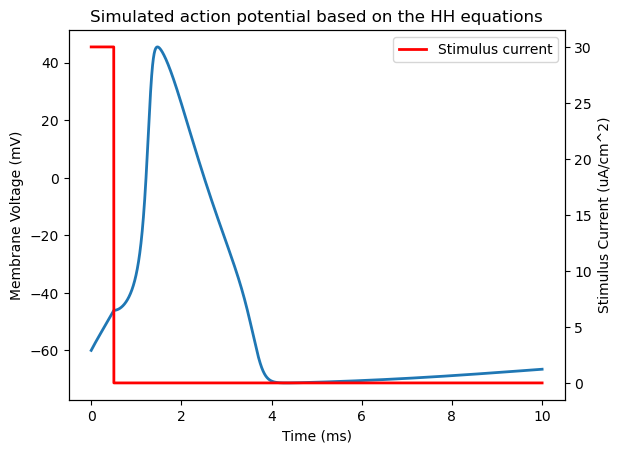

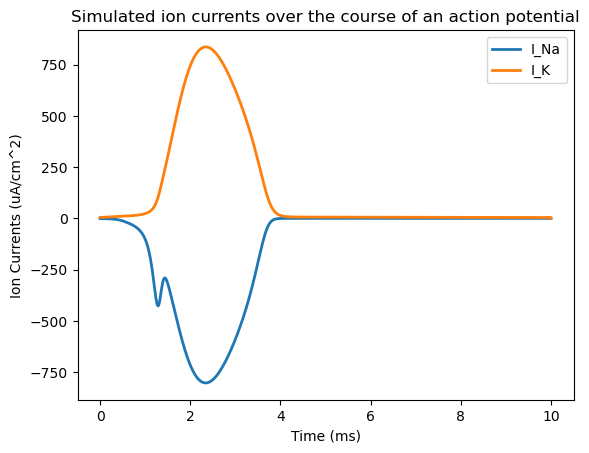

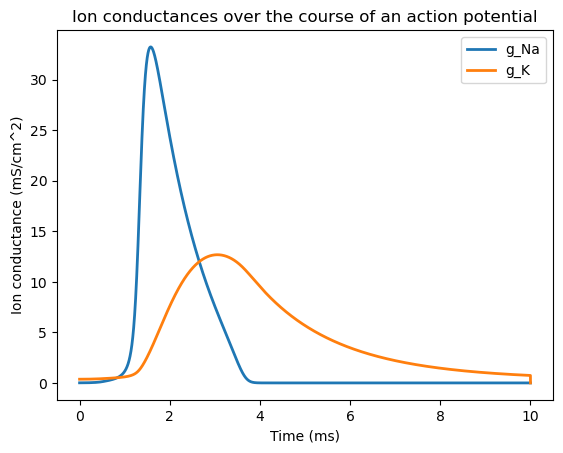

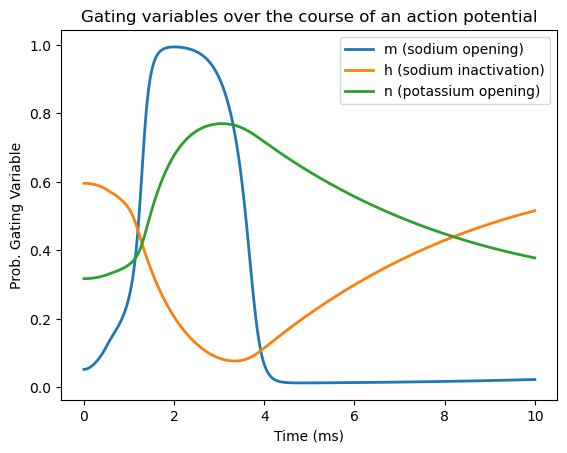

In [37]:
# Simulate an action potential using the HH equations!!

# Simulation parameters
Istim = 30  # uA/cm^2
dur = 0.5  # ms
tmax = 10  # ms
dt = 1e-3  # ms
t = np.arange(0, tmax + dt, dt)

# Preallocate arrays
stim = np.zeros_like(t)
Vm = np.zeros_like(t)
n = np.zeros_like(t)
m = np.zeros_like(t)
h = np.zeros_like(t)
g_Na = np.zeros_like(t)
g_K = np.zeros_like(t)
I_Na = np.zeros_like(t)
I_K = np.zeros_like(t)
I_l = np.zeros_like(t)

# Initialize variables
Vm[0] = Vrest # mV
n[0] = an(Vrest) / (an(Vrest) + Bn(Vrest))
m[0] = am(Vrest) / (am(Vrest) + Bm(Vrest))
h[0] = ah(Vrest) / (ah(Vrest) + Bh(Vrest))

# Simulate the axon's response to a stimulus current
for i in range(len(t) - 1):
    # Apply the stimulus current for the specified duration
    stim[i] = Istim if t[i] <= dur else 0
    
    # Compute conductances
    g_Na[i] = g_Na_max * (m[i] ** 3) * h[i]
    g_K[i] = g_K_max * (n[i] ** 4)
    
    # Compute ionic currents
    I_Na[i] = g_Na[i] * (Vm[i] - E_Na)
    I_K[i] = g_K[i] * (Vm[i] - E_K)
    I_l[i] = g_l * (Vm[i] - E_l)
    
    # Update state variables
    Vm[i+1] = Vm[i] - dt / Cm * (I_Na[i] + I_K[i] + I_l[i] - stim[i])
    n[i+1] = n[i] + dt * (an(Vm[i]) * (1 - n[i]) - Bn(Vm[i]) * n[i])
    m[i+1] = m[i] + dt * (am(Vm[i]) * (1 - m[i]) - Bm(Vm[i]) * m[i])
    h[i+1] = h[i] + dt * (ah(Vm[i]) * (1 - h[i]) - Bh(Vm[i]) * h[i])

# Plot simulated membrane voltage as a result of the applied stimulus current
plt.figure()
plt.plot(t, Vm, linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.title("Simulated action potential based on the HH equations")
# Add the stimulus current to the plot also
plt.twinx()
plt.plot(t, stim, 'r-', linewidth=2, label="Stimulus current")
plt.ylabel("Stimulus Current (uA/cm^2)")
plt.legend()
plt.show()

# Simulated sodium current (I_Na) and potassium current (I_K)
plt.figure()
plt.plot(t, I_Na, label="I_Na", linewidth=2)
plt.plot(t, I_K, label="I_K", linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Currents (uA/cm^2)")
plt.legend()
plt.title("Simulated ion currents over the course of an action potential")
plt.show()

# Simulated sodium conductance (g_Na) and potassium conductance (g_K)
plt.figure()
plt.plot(t, g_Na, label="g_Na", linewidth=2)
plt.plot(t, g_K, label="g_K", linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Ion conductance (mS/cm^2)")
plt.legend()
plt.title("Ion conductances over the course of an action potential")
plt.show()

# Gating variables m, h and n over the course of the action potential
plt.figure()
plt.plot(t, m, label="m (sodium opening)", linewidth=2)
plt.plot(t, h, label="h (sodium inactivation)", linewidth=2)
plt.plot(t, n, label="n (potassium opening)", linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Prob. Gating Variable")
plt.legend()
plt.title("Gating variables over the course of an action potential")
plt.show()


# Let's recreate some graphs from the HH paper!!

<>:33: SyntaxWarning: invalid escape sequence '\i'
<>:55: SyntaxWarning: invalid escape sequence '\i'
<>:76: SyntaxWarning: invalid escape sequence '\i'
<>:33: SyntaxWarning: invalid escape sequence '\i'
<>:55: SyntaxWarning: invalid escape sequence '\i'
<>:76: SyntaxWarning: invalid escape sequence '\i'
/var/folders/qw/_sndq4457jd616hb6zx68mw80000gn/T/ipykernel_84470/220235721.py:33: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("$n_{\infty}$")
/var/folders/qw/_sndq4457jd616hb6zx68mw80000gn/T/ipykernel_84470/220235721.py:55: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("$n_{\infty}$")
/var/folders/qw/_sndq4457jd616hb6zx68mw80000gn/T/ipykernel_84470/220235721.py:76: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel("$h_{\infty}$")


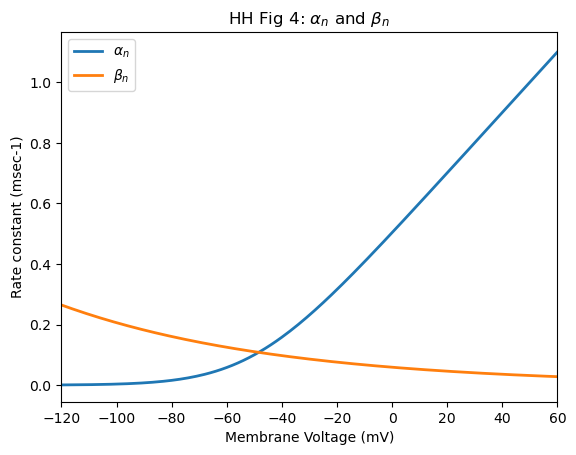

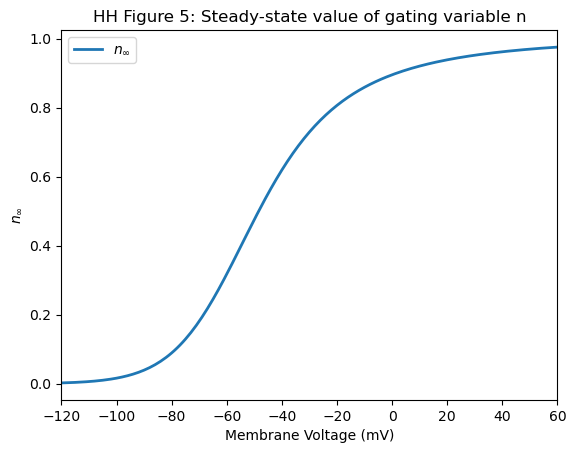

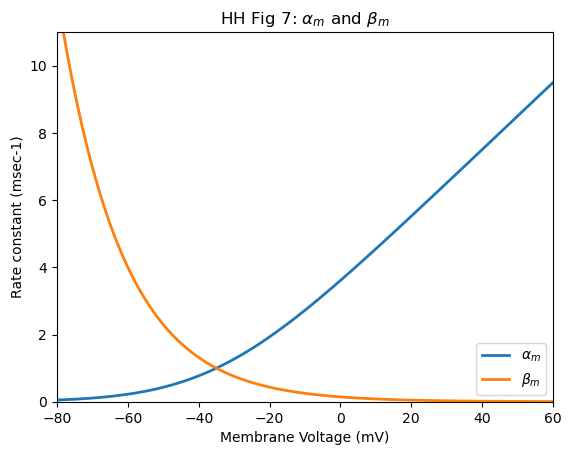

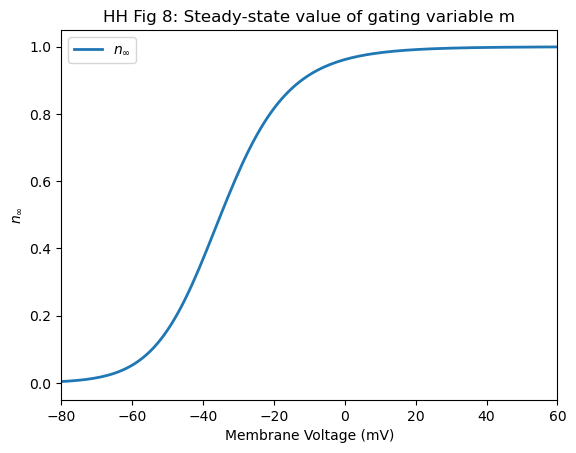

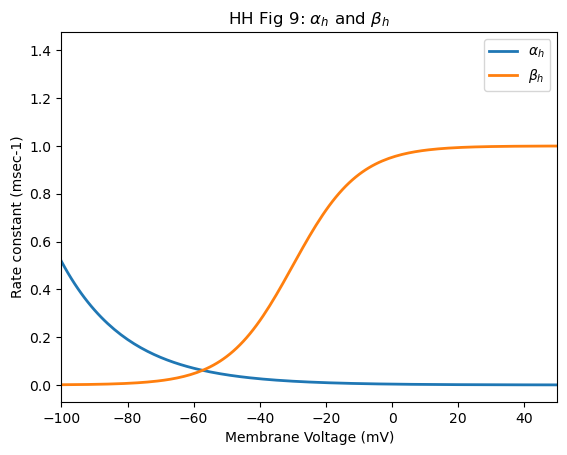

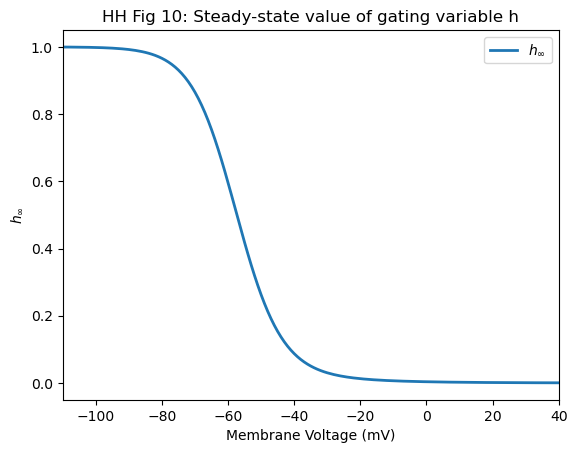

In [33]:
# Generate Vm test range
Vm_test = np.arange(-120.00001, 61, 1)

# Calculate gating variables and rate constants for different membrane voltages
an_vals = an(Vm_test)
Bn_vals = Bn(Vm_test)
am_vals = am(Vm_test)
Bm_vals = Bm(Vm_test)
ah_vals = ah(Vm_test)
Bh_vals = Bh(Vm_test)
n_inf = an_vals / (an_vals + Bn_vals)
m_inf = am_vals / (am_vals + Bm_vals)
h_inf = ah_vals / (ah_vals + Bh_vals)

# Recreate HH Figure 4 (a_n and B_n as a function of membrane voltage)
# Fig 4 is on p. 206-207 of "The Annotated Hodgkin and Huxley"
plt.figure(4)
plt.title("HH Fig 4: $\\alpha_n$ and $\\beta_n$")
plt.plot(Vm_test, an_vals, label=r"$\alpha_n$", linewidth=2)
plt.plot(Vm_test, Bn_vals, label=r"$\beta_n$", linewidth=2)
plt.xlim([-120, 60])
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("Rate constant (msec-1)")
plt.legend()

# Recreate HH Figure 5 (n_infinity as a function of membrane voltage)
# Fig 5 is on p. 206-207 of "The Annotated Hodgkin and Huxley"
plt.figure(5)
plt.title("HH Figure 5: Steady-state value of gating variable n")
plt.plot(Vm_test, n_inf, label=r"$n_{\infty}$", linewidth=2)
plt.xlim([-120, 60])
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("$n_{\infty}$")
plt.legend()

# Recreate HH Figure 7 (a_m and B_m as a function of membrane voltage)
# Fig 7 is on p. 214-215 of "The Annotated Hodgkin and Huxley"
plt.figure(7)
plt.title("HH Fig 7: $\\alpha_m$ and $\\beta_m$")
plt.plot(Vm_test, am_vals, label=r"$\alpha_m$", linewidth=2)
plt.plot(Vm_test, Bm_vals, label=r"$\beta_m$", linewidth=2)
plt.xlim([-80, 60])
plt.ylim([0, 11])
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("Rate constant (msec-1)")
plt.legend()

# Recreate HH Figure 8 (m_infinity as a function of membrane voltage)
# Fig 8 is on p. 216-217 of "The Annotated Hodgkin and Huxley"
plt.figure(8)
plt.title("HH Fig 8: Steady-state value of gating variable m")
plt.plot(Vm_test, m_inf, label=r"$n_{\infty}$", linewidth=2)
plt.xlim([-80, 60])
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("$n_{\infty}$")
plt.legend()

# Recreate HH Figure 9 (a_h and B_h as a function of membrane voltage)
# Fig 9 is on p. 218-219 of "The Annotated Hodgkin and Huxley"
plt.figure(9)
plt.title("HH Fig 9: $\\alpha_h$ and $\\beta_h$")
plt.plot(Vm_test, ah_vals, label=r"$\alpha_h$", linewidth=2)
plt.plot(Vm_test, Bh_vals, label=r"$\beta_h$", linewidth=2)
plt.xlim([-100, 50])
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("Rate constant (msec-1)")
plt.legend()

# Recreate HH Figure 10 (h_infinity as a function of membrane voltage)
# Fig 10 is on p. 220-222 of "The Annotated Hodgkin and Huxley"
plt.figure(10)
plt.title("HH Fig 10: Steady-state value of gating variable h")
plt.plot(Vm_test, h_inf, label=r"$h_{\infty}$", linewidth=2)
plt.xlim([-110, 40])
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("$h_{\infty}$")
plt.legend()

plt.show()
